# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from seaborn import load_dataset

tips = load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [15]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.
reg = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.64e-20
Time:                        20:40:38   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Remova as variáveis não significantes.
#Removendo aquelas com P > 0.05 e com intervalo bem grande
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           5.02e-23
Time:                        20:40:40   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

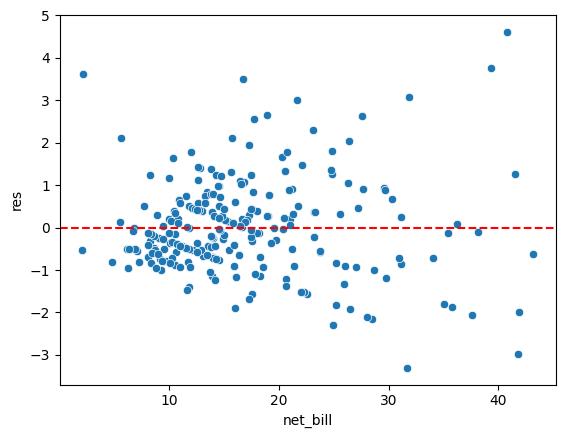

In [17]:
#observe o gráfico de resíduos em função de net_bill
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
#teste transformar net_bill no log e um polinômio. Escolha o melhor modelo. - LOG
reglog = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
reglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           4.40e-20
Time:                        20:43:52   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

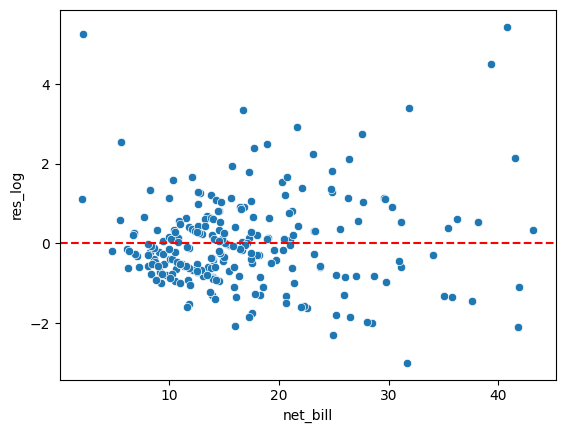

In [20]:
tips['res_log'] = reglog.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [24]:
#teste transformar net_bill no log e um polinômio. Escolha o melhor modelo. - POLINOMIO
#POLINOMIO DE QUAL GRAU? FAVOR ESPECIFICAR. Fiz com grau 2
regpol2 = smf.ols('tip ~ np.power(net_bill,2) + net_bill', data = tips).fit()
regpol2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           4.96e-22
Time:                        20:46:34   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

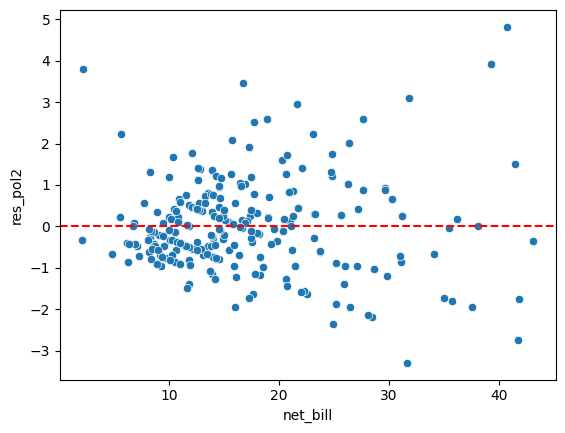

In [25]:
tips['res_pol2'] = regpol2.resid
sns.scatterplot(x = 'net_bill', y = 'res_pol2', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

teste transformar net_bill no log e um polinômio. Escolha o melhor modelo. -


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
R-squared:	0.333 (polinômio 1o grau)
R-squared:	0.294 (log)
R-squared:	0.334 (polinômio 2o grau)

Pelos R-squared, o melhor modelo seria o de polinômio de 2o grau.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [27]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [29]:
#Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa.
# Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

modelo = smf.ols('renda ~ tempo_emprego', data=df).fit()
modelo.summary()
#não vi nenhuma observação na tabela de dados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:51:32   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

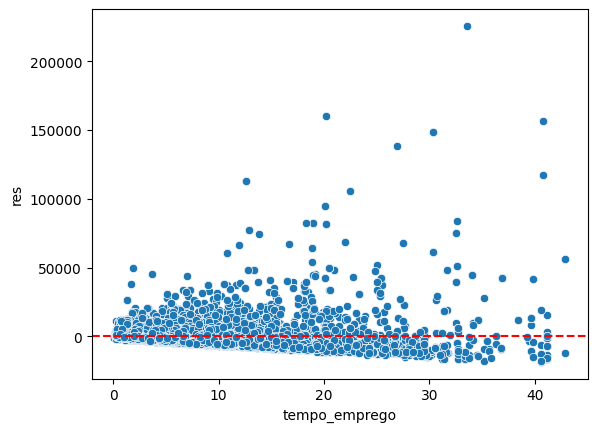

In [30]:
#Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
df['res'] = modelo.resid
sns.scatterplot(x='tempo_emprego', y='res', data=df)
plt.axhline(y=0, color='r', linestyle='--')

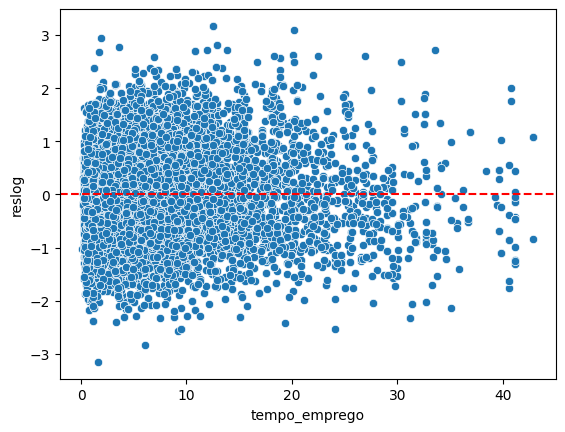

In [31]:
#melhorando a regressao
modelolog = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()
modelolog.summary()

df['reslog'] = modelolog.resid
sns.scatterplot(x='tempo_emprego', y='reslog', data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [32]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'res', 'reslog'],
      dtype='object')

In [37]:
#Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.
modelolog2 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade +  tempo_emprego + qt_pessoas_residencia', data=df).fit()
modelolog2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:04   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

In [42]:
modelolog3 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + qtd_filhos + estado_civil + idade +  tempo_emprego + qt_pessoas_residencia', data=df).fit()
modelolog3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     453.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:28:32   Log-Likelihood:                -13603.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12411   BIC:                         2.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          6.5951      0.219     30.152      0.000       6.166       7.024
sexo[T.M]                          0.7819      0.015     53.480      0.000       0.753       0.811
posse_de_veiculo[T.True]           0.0535      0.014      3.789      0.000       0.026       0.081
posse_de_imovel[T.True]            0.0848      0.014      6.172      0.000       0.058       0.112
tipo_renda[T.Bolsista]             0.2998      0.242      1.241      0.215      -0.174       0.773
tipo_renda[T.Empresário]           0.1655      0.015     11.120      0.000       0.136       0.195
tipo_renda[T.Pensionista]         -0.2540      0.242     -1.051      0.293      -0.728       0.220
tipo_renda[T.Servidor público]     0.0769      0.022      3.472      0.001       0.033       0.120
estado_civil[T.Separado]           0.3241      0.112      2.907      0.004       0.106       0.543
estado_civil[T.Solteiro]           0.2623      0.109      2.403      0.016       0.048       0.476
estado_civil[T.União]             -0.0361      0.025     -1.431      0.153      -0.086       0.013
estado_civil[T.Viúvo]              0.3588      0.116      3.097      0.002       0.132       0.586
qtd_filhos                        -0.2560      0.108     -2.366      0.018      -0.468      -0.044
idade                              0.0048      0.001      6.147      0.000       0.003       0.006
tempo_emprego                      0.0617      0.001     59.407      0.000       0.060       0.064
qt_pessoas_residencia              0.2839      0.108      2.629      0.009       0.072       0.496
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.121
Skew:                           0.021   Prob(JB):                        0.571
Kurtosis:                       3.019   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

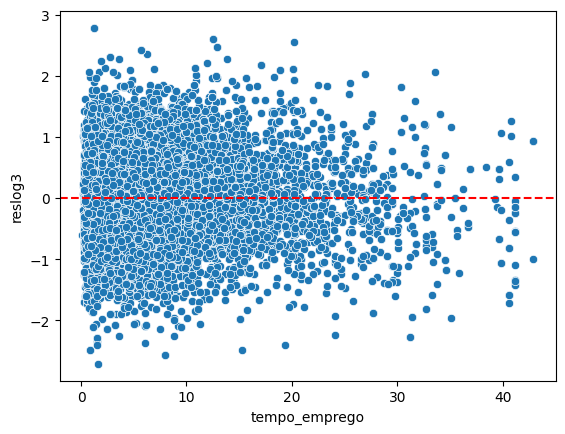

In [43]:
df['reslog3'] = modelolog3.resid
sns.scatterplot(x='tempo_emprego', y='reslog3', data=df)
plt.axhline(y=0, color='r', linestyle='--')

Conclusão é que o primeiro modelo é mais simples e ainda tem r-squared pouco melhor que este último modelo que utiliza muitas variáveis